모두의 연구소, 2024 AI 코칭스터디 팀 활동을 통해 정리한 내용입니다.  
- 로롱코치_6팀 : @엔터6(변찬우) 

- https://datascienceschool.net/01%20python/05.01%20%EC%8B%9C%EA%B0%81%ED%99%94%20%ED%8C%A8%ED%82%A4%EC%A7%80%20%EB%A7%B7%ED%94%8C%EB%A1%AF%EB%A6%AC%EB%B8%8C%20%EC%86%8C%EA%B0%9C.html
- https://yganalyst.github.io/visualization/visual_2/ 

## **Matplotlib 주요 그래프의 특징과 예제 코드**
- 라인 플롯(line plot)
- 스캐터 플롯(scatter plot)
- 컨투어 플롯(contour plot)
- 서피스 플롯(surface plot)
- 바 차트(bar chart)
- 히스토그램(histogram)
- 박스 플롯(box plot)

#### **라인 플롯(line plot)**

- 특징
    - 데이터의 변화를 선으로 연결하여 시각화합니다.
    - 시간에 따른 데이터 변화를 표현하는 데 자주 사용됩니다.

- 데이터 요건
    - 연속적인 x와 y 값 쌍.
    - 보통 시간에 따른 변화나 트렌드를 나타냅니다.

- 예시 데이터:
    - 주식 시장의 일일 종가.
    - 날씨 데이터(일일 평균 기온).
    - 시간에 따른 판매 수치.

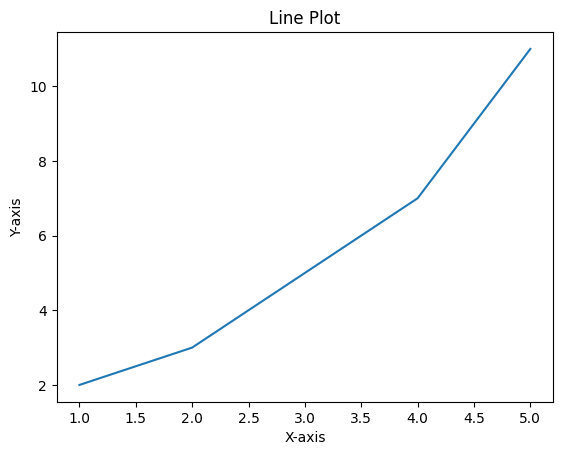

In [1]:
## 기본 예시  
import matplotlib.pyplot as plt

# 데이터 생성
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 라인 플롯 그리기
plt.plot(x, y)
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [3]:
## 활용 예시 - open api 
# 라인 플롯(line plot)은 시계열 데이터를 표현할때 주로 활용한다. 이를 위한 예제 데이터로 기상청 날씨 데이터를 활용해보자.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 아래 데이터는 관측지점(지점)별, 시간(일시)별 다양한 기상정보를 담고 있는 공공데이터
df = pd.read_csv("https://raw.githubusercontent.com/yganalyst/data_example/main/weather.csv", encoding='cp949')
df["일시"] = pd.to_datetime(df["일시"])
df.head(5)

,지점,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,184,2019-09-01 00:00:00,23.7,NaN,NaN,NaN,2.0,NaN,180.0,NaN,...,35.0,2000.0,NaN,NaN,23.1,NaN,26.3,25.7,25.2,26.9
1,184,2019-09-01 01:00:00,23.7,NaN,NaN,NaN,2.1,NaN,180.0,NaN,...,73.0,2000.0,NaN,NaN,23.0,NaN,26.0,25.5,25.0,26.9
2,184,2019-09-01 02:00:00,23.5,NaN,NaN,NaN,1.4,NaN,180.0,NaN,...,69.0,2000.0,NaN,NaN,22.9,NaN,25.8,25.3,24.9,26.9
3,184,2019-09-01 03:00:00,23.4,NaN,NaN,NaN,1.1,NaN,180.0,NaN,...,10.0,2000.0,NaN,NaN,22.6,NaN,25.6,25.2,24.7,27.0
4,184,2019-09-01 04:00:00,23.4,NaN,NaN,NaN,1.6,NaN,180.0,NaN,...,10.0,2000.0,NaN,NaN,22.6,NaN,25.5,24.9,24.5,27.0


In [ ]:
# 기본적으로 font는 ‘sans-erif’를 default로 하기 때문에 한글 지원을 하지 않는다.
import matplotlib
matplotlib.rcParams['font.family']

In [ ]:
# for Win 
import matplotlib
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# for Mac  
import matplotlib.pyplot as plt
from matplotlib import rc 

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

In [ ]:
import matplotlib
matplotlib.rcParams['font.family']

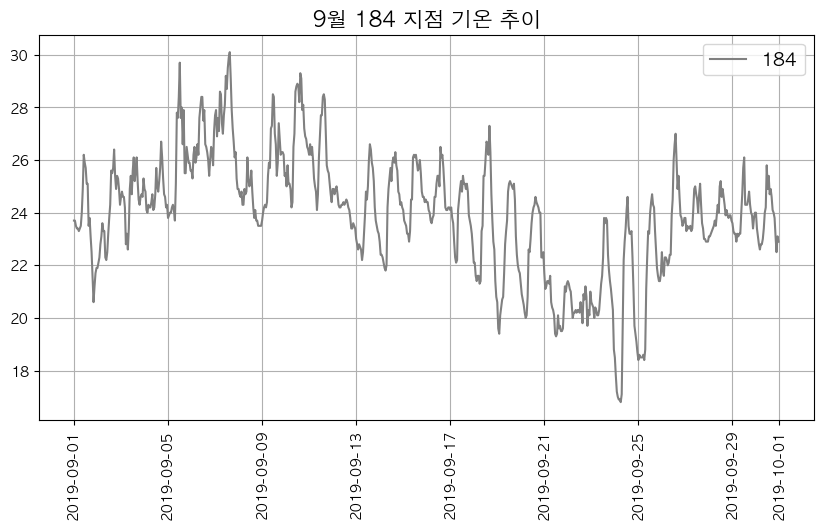

In [8]:
# plt.plot()함수를 활용하면 되는데, 단순히 마커만 표시하는게 아니라 간단하게 선으로 연결해주기만 하면 된다.
spot_ = 184
d_ = df[(df["지점"]==spot_) & (df["일시"].dt.month==9)]
plt.figure(figsize=(10,5))
plt.title("9월 %s 지점 기온 추이" % spot_, fontsize=15)
plt.plot(d_["일시"], d_["기온(°C)"], "-", color='grey', label=str(spot_))
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)

# plt.savefig("temp/plt_kr_encording_error.png") #출력 결과를 파일로 저장
plt.show()

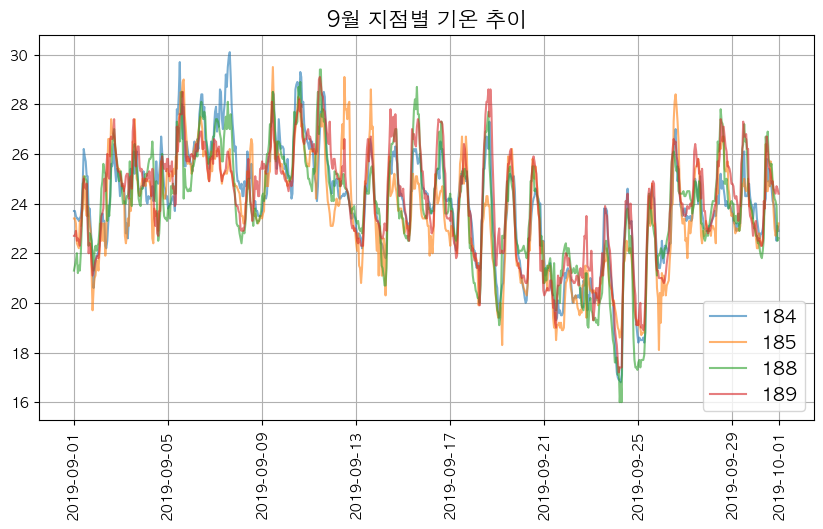

In [9]:
# 여러 데이터를 중첩해서 그리기 위해서는 그래프 창 설정(plt.figure())과 최종(plt.show())사이에 여러번 plot을 해주기만 하면 된다.

plt.figure(figsize=(10,5))
plt.title("9월 지점별 기온 추이", fontsize=15)
for spot_ in [184, 185, 188, 189]:
    d_ = df[(df["지점"]==spot_) & (df["일시"].dt.month==9)]
    plt.plot(d_["일시"], d_["기온(°C)"], "-", label=str(spot_), alpha=.6)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

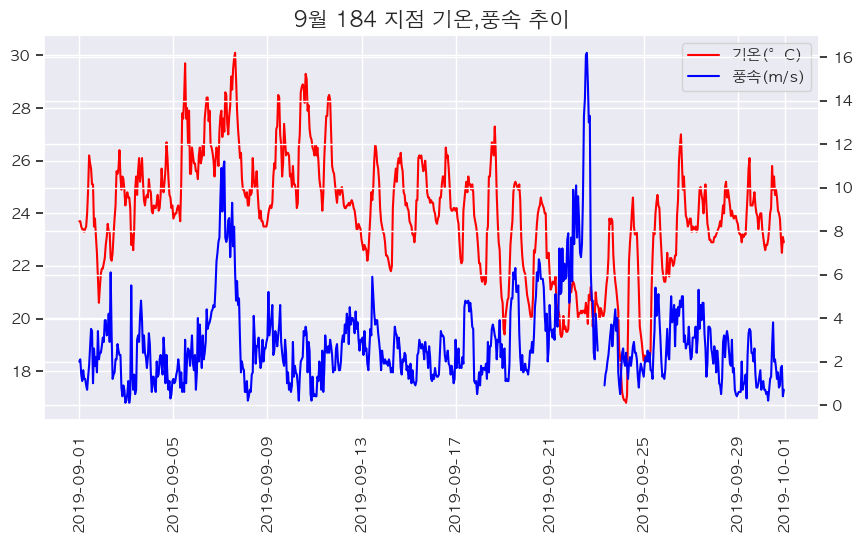

In [ ]:
# y축 2개 활용하기
# 두개의 데이터를 동시에 시각화하고 싶은데, 단위가 달라서 적절하게 보여지지 않을 경우 하나의 y축을 우측에도 사용함으로써 보여줄 수 있다.
# 이를 위해서 twinx()을 통해 동일한 그래프에 두 축을 활용할 수 있고, 두 축에대한 범례를 get.label()함수를 통해 개별적으로 추가해주어야 한다.

spot_ = 184
d_ = df[(df["지점"]==spot_) & (df["일시"].dt.month==9)]
plt.figure(figsize=(10,5))
plt.title("9월 %s 지점 기온,풍속 추이" % spot_, fontsize=15)
plt.xticks(rotation=90)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(d_["일시"], d_["기온(°C)"], "-", color='red', label="기온(°C)")
b, = ax2.plot(d_["일시"], d_["풍속(m/s)"], "-", color='blue', label="풍속(m/s)")
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
plt.show()

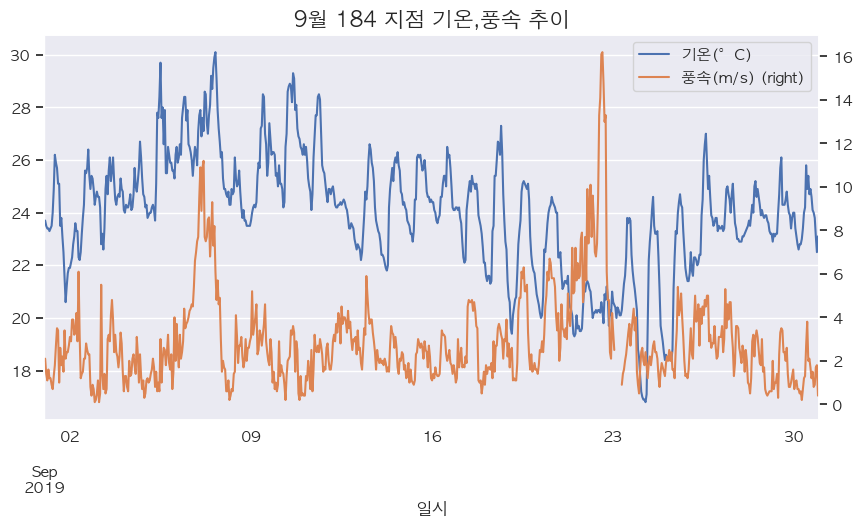

In [ ]:
# Pandas에 내장된 기능을 활용하면 아래와 같이 보다 간편한 방법으로 시각화 할 수 있다.

ax = d_.plot('일시','기온(°C)', figsize=(10,5))
plt.title("9월 %s 지점 기온,풍속 추이" % spot_, fontsize=15)
d_.plot('일시','풍속(m/s)',secondary_y=True, ax=ax)
plt.show()

#### **스캐터 플롯(scatter plot)**

- 특징 
    - 데이터 포인트를 개별 점으로 시각화합니다.
    - 두 변수 간의 관계를 나타낼 때 유용합니다.
- 데이터 요건:
    - 두 변수 간의 관계를 나타내는 데이터 포인트.
    - x와 y 값 쌍이 필요하며 반드시 순서가 필요하지는 않음.
- 예시 데이터:
    - 광고 비용과 매출 간의 관계.
    - 학생들의 공부 시간과 시험 점수.
    - 키와 몸무게의 관계.

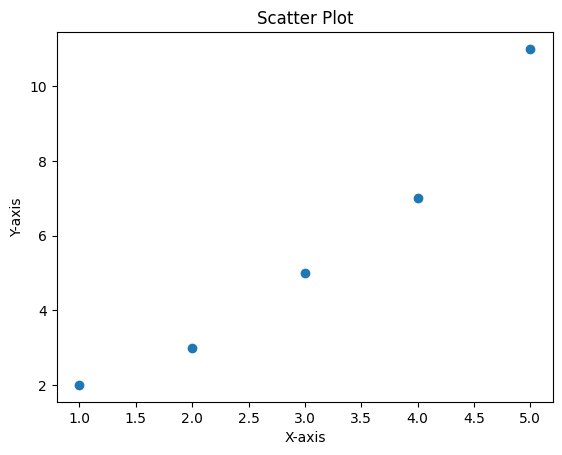

In [ ]:
## 기본 예제 
import matplotlib.pyplot as plt

# 데이터 생성
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 스캐터 플롯 그리기
plt.scatter(x, y)
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


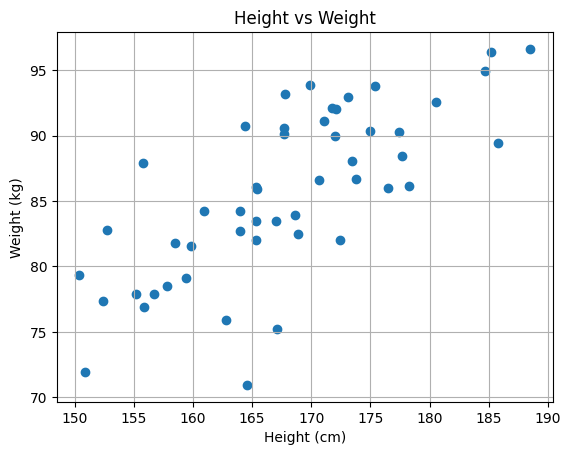

In [ ]:
# 활용 예제 - 키와 몸무게의 관계를 시각화   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 랜덤 샘플 데이터 생성
np.random.seed(42)  # 재현성을 위해 시드 설정

# 키 (cm)
heights = np.random.normal(170, 10, 50)

# 몸무게 (kg)
weights = heights * 0.45 + np.random.normal(10, 5, 50)

# 데이터프레임 생성
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights
})

# CSV 파일로 저장
csv_file = 'data/height_weight_data.csv'
data.to_csv(csv_file, index=False)

# CSV 파일 불러오기
loaded_data = pd.read_csv(csv_file)

# 스캐터 플롯 그리기
plt.scatter(loaded_data['Height'], loaded_data['Weight'])
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


#### **컨투어 플롯(contour plot)**


- 특징
    - 3차원 데이터의 2차원 등고선을 그립니다.
    - 고도, 기온 등의 연속적인 분포를 나타낼 때 유용합니다.
- 데이터 요건:
    - 3차원 데이터(2개의 독립 변수와 1개의 종속 변수).
    - 격자 형태의 x, y, z 데이터.
- 예시 데이터:
    - 지형의 고도 데이터(높이에 따른 x, y 위치).
    - 기상학에서의 기압 분포.
    - 화학 반응에서의 온도와 농도에 따른 반응 속도.

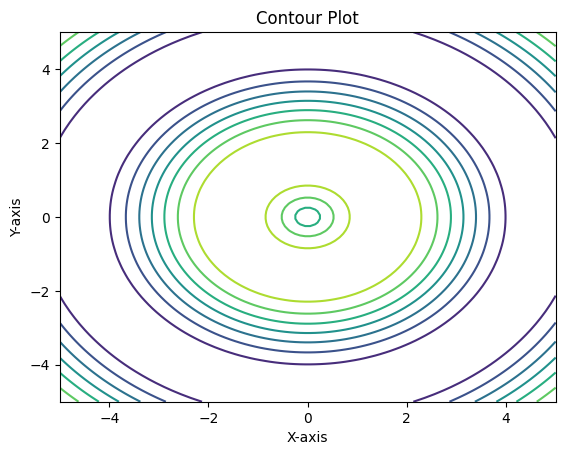

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 컨투어 플롯 그리기
plt.contour(X, Y, Z)
plt.title('Contour Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


#### **서피스 플롯(surface plot)**

- 특징 
    - 3차원 데이터를 3차원 공간에 시각화합니다.
    - 복잡한 데이터 구조를 시각화하는 데 유용합니다.
- 데이터 요건:
    - 3차원 데이터(2개의 독립 변수와 1개의 종속 변수).
    - 격자 형태의 x, y, z 데이터.
- 예시 데이터:
    - 지형의 3차원 모델.
    - 제품의 품질 검사에서 온도와 압력에 따른 결함 발생 빈도.
    - 공학에서의 구조 해석(응력 분포).

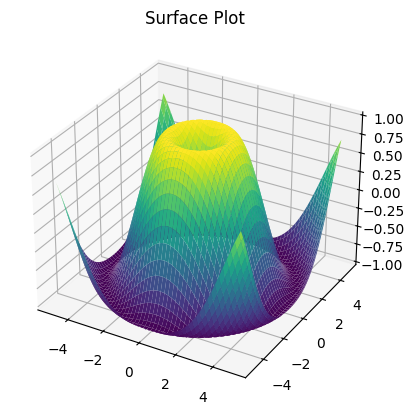

In [ ]:
# 기본 예제  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 서피스 플롯 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Surface Plot')
plt.show()


#### **바 차트(bar chart)**

- 특징
    - 범주형 데이터의 크기를 막대로 나타냅니다.
    - 데이터 비교에 유용합니다.
- 데이터 요건:
    - 범주형 데이터와 해당 범주에 대한 값.
    - 범주형 데이터는 일반적으로 이산적임.
- 예시 데이터:
    - 각 과목별 학생 수.
    - 제품 카테고리별 매출.
    - 다양한 소셜 미디어 플랫폼의 사용자 수.

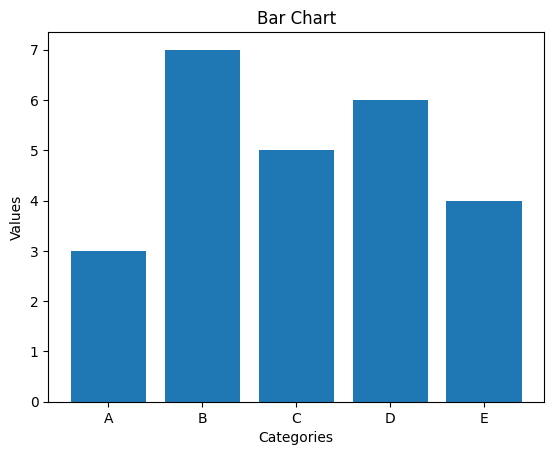

In [ ]:
import matplotlib.pyplot as plt

# 데이터 생성
categories = ['A', 'B', 'C', 'D', 'E']
values = [3, 7, 5, 6, 4]

# 바 차트 그리기
plt.bar(categories, values)
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


#### **히스토그램(histogram)**

- 특징
    - 데이터의 분포를 나타내는 데 사용됩니다.
    - 데이터의 빈도수를 막대 그래프로 표현합니다.
- 데이터 요건:
    - 연속적인 데이터의 분포를 나타내는 값.
    - 데이터는 연속적이거나 구간으로 나눌 수 있어야 함.
- 예시 데이터:
    - 시험 점수 분포.
    - 일일 웹사이트 방문자 수.
    - 제조 공정에서의 제품 크기 변동.

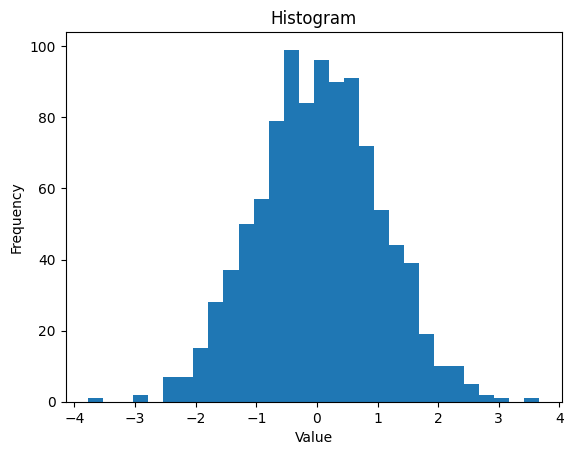

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
data = np.random.randn(1000)

# 히스토그램 그리기
plt.hist(data, bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### **박스 플롯(box plot)**

- 특징
    - 데이터의 분포와 이상치를 시각화합니다.
    - 여러 데이터셋을 비교할 때 유용합니다.
- 데이터 요건:
    - 하나 이상의 데이터셋.
    - 각 데이터셋은 최소값, 제 1사분위수, 중위수, 제 3사분위수, 최대값을 계산할 수 있어야 함.
- 예시 데이터:
    - 여러 반의 시험 점수 비교.
    - 다양한 기간 동안의 주식 수익률.
    - 다양한 제품 라인의 수명 데이터.

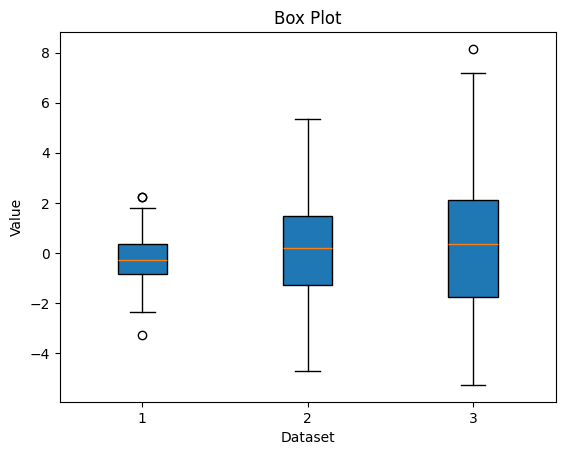

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# 박스 플롯 그리기
plt.boxplot(data, vert=True, patch_artist=True)
plt.title('Box Plot')
plt.xlabel('Dataset')
plt.ylabel('Value')
plt.show()


## **여러 개의 그래프 그리기** 
- 여러 개의 그래프를 그릴 경우, figure과 axes이라는 개념을 사용해야한다

In [95]:
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt

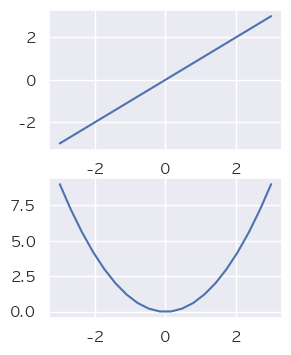

In [96]:
# [경우1] : figure을 1개 준비해서, 그 안에 axes를 2개 만드는 경우

x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
 
# figure는 1개
plt.figure(figsize=(3, 4))
 
plt.subplot(2,1,1)
plt.plot(x, y1)
 
plt.subplot(2,1,2)
plt.plot(x, y2)
 
plt.show()

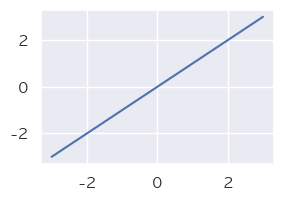

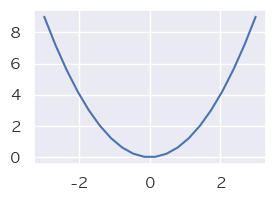

In [97]:
# [경우2] : figure을 2개 준비해서, 그 안에 axes를 1개씩 만드는 경우

x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
 
# 첫 번째 figure
plt.figure(figsize=(3, 2))
plt.plot(x, y1)
plt.savefig("temp/matplotlib_plt_image1.png") #출력 결과를 파일로 저장
 
# 두 번째 figure
plt.figure(figsize=(3, 2))
plt.plot(x, y2)
 
plt.savefig("temp/matplotlib_plt_image2.png") #출력 결과를 파일로 저장
plt.show()

그리드(grid)상에 그래프를 배치
- subplot(행의 수, 열의 수, 플롯 번호)

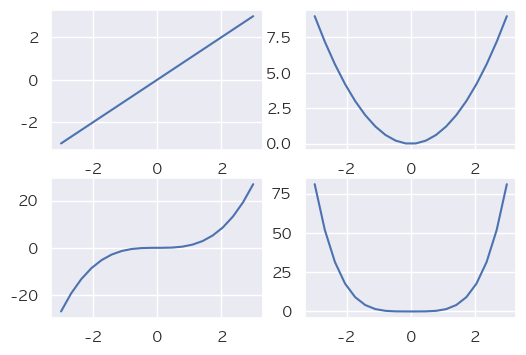

In [98]:
x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4
 
plt.figure(figsize=(6,4))
 
# 왼쪽 위
plt.subplot(2,2,1)
plt.plot(x, y1)
 
# 오른쪽 위
plt.subplot(2,2,2)
plt.plot(x, y2)
 
# 왼쪽 아래
plt.subplot(2,2,3)
plt.plot(x, y3)
 
# 오른쪽 아래
plt.subplot(2,2,4)
plt.plot(x, y4)
 
plt.show()

자유롭게 그래프를 배치
- axes([왼쪽, 아래, 폭, 높이])
- 각 값은 0부터 1사이의 소수만 지정할 수 있다.

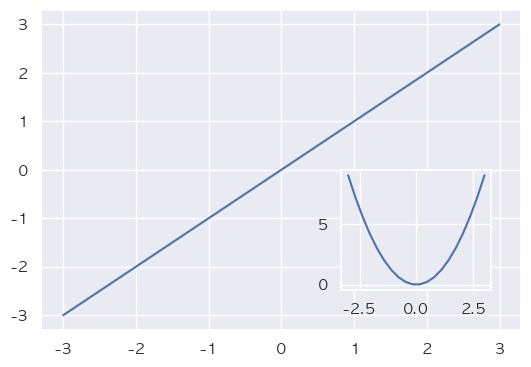

In [99]:
x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
 
fig = plt.figure(figsize=(6, 4))
 
plt.axes([0.1, 0.1, 0.8, 0.8])
plt.plot(x, y1)
 
plt.axes([0.6, 0.2, 0.25, 0.3])
plt.plot(x, y2)
 
plt.show()

그리드 상에 불규칙적으로 배치
- GridSpec를 사용하면, 그리드 상에 불규칙적으로 그래프를 배치할 수 있다.
- gs를 2x3의 2차원 배열로 가정해, 그래프를 배치하고 싶은 장소에 지정할 수 있다. 
    - gs[0, 0]  ⇒ 왼쪽 위
    - gs[0, :]  ⇒ 1행의 모두
    - gs[:, -1] ⇒ 마지막 열 모두
- gs[x, x]를 subplot에 전달해 좌표축을 만든다.
    - plt.subplot(gs[:, -1])

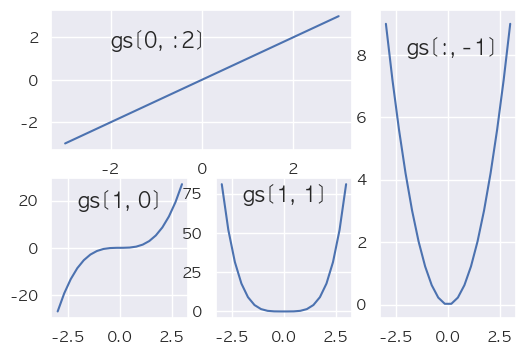

In [100]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
 
x = np.linspace(-3, 3, 20)
y1 = x
y2 = x ** 2
y3 = x ** 3
y4 = x ** 4
 
plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(2,3) #  figure을 2x3의 그리드로 분할
 
plt.subplot(gs[0, :2])
plt.plot(x, y1)
plt.text(-2, 1.5, 'gs[0, :2]', size=15)
 
plt.subplot(gs[:, -1])
plt.plot(x, y2)
plt.text(-2, 8, 'gs[:, -1]', size=15)
 
plt.subplot(gs[1, 0])
plt.plot(x, y3)
plt.text(-2, 17, 'gs[1, 0]', size=15)
 
plt.subplot(gs[1, 1])
plt.plot(x, y4)
plt.text(-2, 70, 'gs[1, 1]', size=15)
 
plt.show()

## **실습 - 캐글 데이터 세트** 
캐글 데이터 세트를 통해 미국 매출 기준 상위 10개 레스토랑에 대한 차트 고도화 과정 

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [18]:
future50 = pd.read_csv("data/business_rankings_2020.csv")
future50.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


### 1. 기본 막대차트

Text(0.5, 1.0, 'Top 10 U.S.Restaurants by Sales')

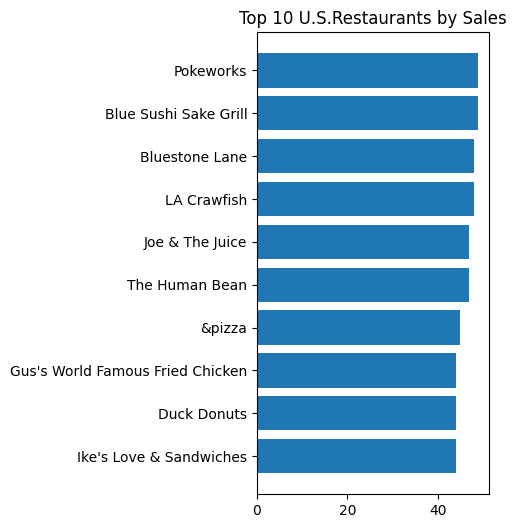

In [24]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

### 2. 개선

**1단계 - 검은 박스 제거**

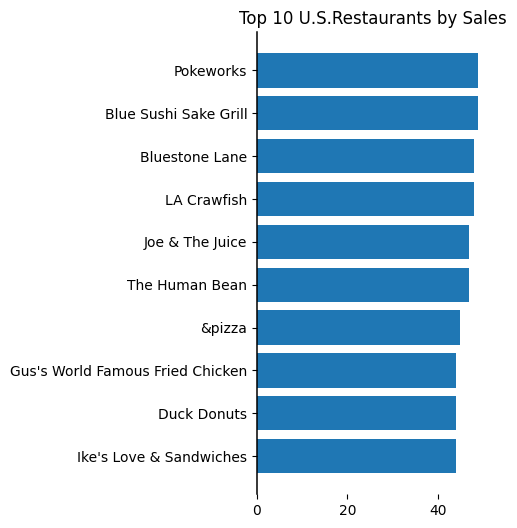

In [26]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

# 필요 없는 검은 상자 제거
ax.spines[["top", "right", "bottom"]].set_visible(False) 
ax.spines["left"].set_linewidth(1.1)

**2단계 - 그리드 추가 및 눈금 레이블 사용자 지정**

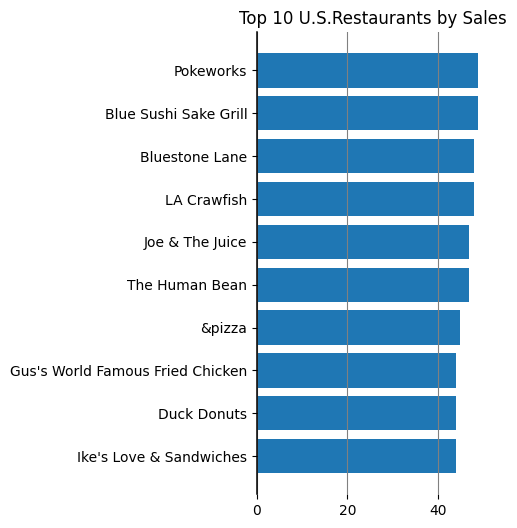

In [27]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

# 필요 없는 검은 상자 제거
ax.spines[["top", "right", "bottom"]].set_visible(False) 
ax.spines["left"].set_linewidth(1.1)

# 그리드 세팅
ax.grid(which="major", axis="x" ,color="grey")

- zorder 추가
- 막대 위에 있는 굵은 회색 격자선의 경우 
    - 속성 alpha를 미세 조정하여 - 불투명도를 조정(1에서 0.6으로)
    - 막대가 전면에 나타나게 - zorder 속성을 사용
        - 그리드에 대해 zorder=1, 
        - 막대에 대해 zorder=2를 설정하여 전경에 있도록 조정 

<BarContainer object of 10 artists>

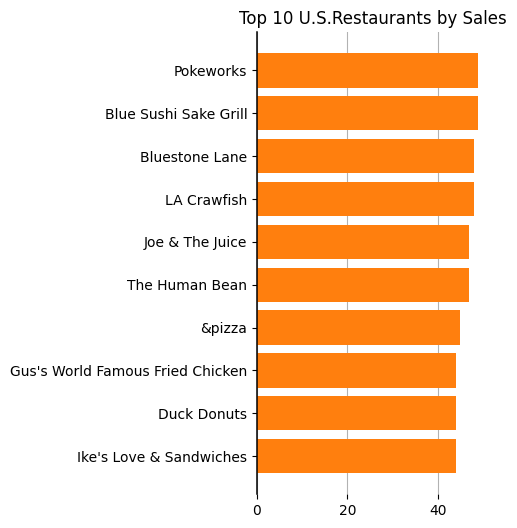

In [28]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

# 필요 없는 검은 상자 제거
ax.spines[["top", "right", "bottom"]].set_visible(False) 
ax.spines["left"].set_linewidth(1.1)

# 그리드 세팅
ax.grid(which="major", axis="x" ,color="grey")

# zorder 추가 
ax.grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1) 
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'], zorder=2)

- 눈금 레이블 조정 

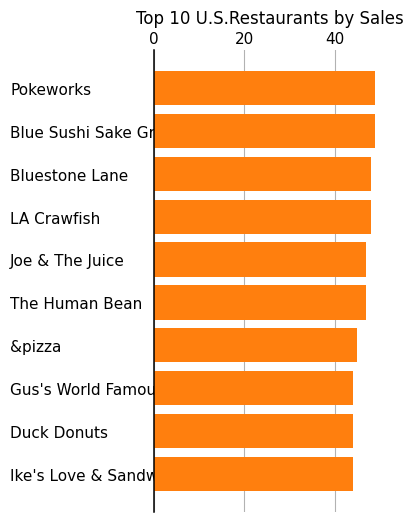

In [34]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

# 필요 없는 검은 상자 제거
ax.spines[["top", "right", "bottom"]].set_visible(False) 
ax.spines["left"].set_linewidth(1.1)

# 그리드 세팅
ax.grid(which="major", axis="x" ,color="grey")

# zorder 추가 
ax.grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1) 
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'], zorder=2)

# x-axis tick labels 재설정
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, bottom=False, labelsize=11, pad=-1)

# y-axis tick labels 재설정
ax.set_yticks(range(len(future50Bar['Restaurant'])))  

# 축에 고정된 개수의 눈금이 없는 경우, set_yticklabels 앞에 set_yticks 메서드를 사용하여 축에 레이블을 적용할 위치를 미리 설정
ax.set_yticklabels(future50Bar['Restaurant'],ha='left') 
ax.yaxis.set_tick_params(pad=100, labelsize=11, bottom=False)

**3단계 - 텍스트 추가(제목,자막,출처)**

text 함수를 사용하여 그래프에 텍스트를 추가합니다 
- transform = fig.transFigure
- Matplotlib 문서에서 그림의 좌표계: (0,0)은 그림의 왼쪽 하단이고 (1,1)은 그림의 오른쪽 상단입니다 

Text(-0.35, 0.08, 'Source: "Restaurant Business Rankings 2020" via Kaggle.com')

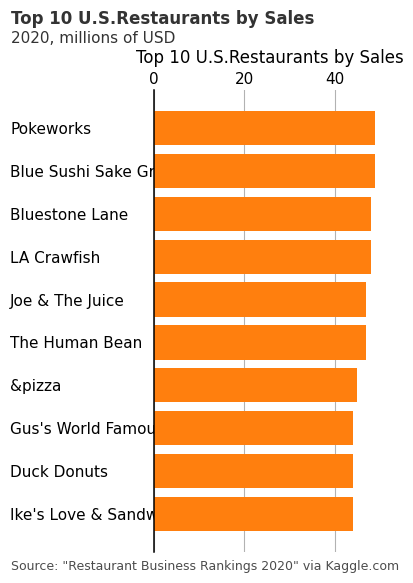

In [40]:
# 연도(2019)를 나타내는 변수 삽입
future50['year'] = 2019

# 그래프 크기 세팅
fig,ax = plt.subplots(figsize=(3,6))

# 데이터 추출
future50Bar = future50[future50['year'] == 2019].sort_values(by='Sales')[-10:]

# 그래프 출력
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'])
ax.set_title('Top 10 U.S.Restaurants by Sales', loc ='center')

# 필요 없는 검은 상자 제거
ax.spines[["top", "right", "bottom"]].set_visible(False) 
ax.spines["left"].set_linewidth(1.1)

# 그리드 세팅
ax.grid(which="major", axis="x" ,color="grey")

# zorder 추가 
ax.grid(which="major",axis="x", color='grey', alpha=0.6, zorder=1) 
ax.barh(future50Bar['Restaurant'], future50Bar['Sales'], zorder=2)

# x-axis tick labels 재설정
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False, bottom=False, labelsize=11, pad=-1)

# y-axis tick labels 재설정
ax.set_yticks(range(len(future50Bar['Restaurant'])))  

# 축에 고정된 개수의 눈금이 없는 경우, set_yticklabels 앞에 set_yticks 메서드를 사용하여 축에 레이블을 적용할 위치를 미리 설정
ax.set_yticklabels(future50Bar['Restaurant'],ha='left') 
ax.yaxis.set_tick_params(pad=100, labelsize=11, bottom=False)

# 제목과 부제목 추가
ax.text(x=-.35, y=.99, s="Top 10 U.S.Restaurants by Sales", 
        transform=fig.transFigure, ha='left', fontsize=12, weight='bold', alpha=.8)
ax.text(x=-.35, y=.958, s="2020, millions of USD", 
        transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# 텍스트 추가
ax.text(x=-.35, y=.08, s="""Source: "Restaurant Business Rankings 2020" via Kaggle.com""", 
        transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

## to be 레퍼런스 
- https://www.kaggle.com/code/chazzer/plotly-tutorial-be-a-visualization-grandmaster
- https://www.kaggle.com/code/saurav9786/interactive-3d-plots-for-visualisation#1.Import-necessary-libraries- 